檔案網址
https://www.superdatascience.com/machine-learning/

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt #pyplot是次libraries
from os import listdir
from os.path import isfile,isdir,join
from os import walk


In [2]:
mypath = "Machine Learning A-Z Template Folder/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/SVR"
files = listdir(mypath)

# 遞迴列出所有子目錄與檔案
for root, dirs, files in walk(mypath):#找出資料夾內容
  print("路徑：", root)
  print("  目錄：", dirs)
  print("  檔案：", files)

for root, dirs, files in walk(mypath): #讀取絕對路徑
  for f in files:
    fullpath = join(root, f)
    print(fullpath)

路徑： Machine Learning A-Z Template Folder/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/SVR
  目錄： []
  檔案： ['Position_Salaries.csv', 'regression_template.py', 'regression_template.R', 'svr.py', 'svr.R']
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/SVR/Position_Salaries.csv
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/SVR/regression_template.py
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/SVR/regression_template.R
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/SVR/svr.py
Machine Learning A-Z Template Folder/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/SVR/svr.R


In [3]:
datapath= mypath + '/'+ 'Position_Salaries.csv' #可列出資料位置
testdata = pd.read_csv(datapath)

In [4]:
testdata 
#可看出是非線性
#只要後兩行來做訓練

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [30]:
x = testdata.iloc[:, 1:2].values 
#左邊的 : 是整行line（0-9）
#右邊的:-1是列columns,此數據x的:-1跟 
#0雖然一樣，但在最後fit時會影響到，因為訓練時要使用x要用matrix,y要用vector
y = testdata.iloc[:, 2:3].values

In [31]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

SVR

step 1 feature scaling

In [32]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)
#為何要做feature scaling?-->是因為要分類嗎？
#另外y要先改成matrix才能進入

/Users/benwang/anaconda2/envs/python3.5/lib/python3.5/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
y = y.reshape(10)
np.shape(y)
#reshape轉回vactor
y

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [35]:
from sklearn.svm import SVR

In [36]:
SVR_reg = SVR(kernel='rbf')
#SVR要指定kernel

SVR_reg.fit(x,y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
pred_y = SVR_reg.predict(x)

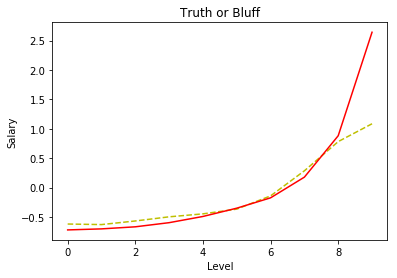

In [40]:

plt.plot(pred_y,'y--')
plt.plot(y,'r')
plt.title('Truth or Bluff')
plt.xlabel(testdata.columns[1])
plt.ylabel(testdata.columns[2])
plt.show()
#目前SVR還不能完整的fit，如最高點的CEO

predicting a new result with Linear regresstion

In [47]:
y_pred = sc_y.inverse_transform(SVR_reg.predict(sc_x.transform(np.array([[6.5]]))))
#此部分，因為數字做過調整，所以輸入的數字也要調整
#輸入的直要是矩陣

In [48]:
y_pred

array([ 170370.0204065])

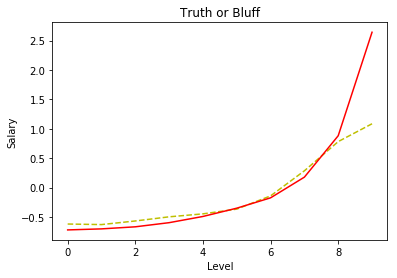

In [49]:
#可用以下來優化
x_grid = np.arange(min(x),max(x),0.1) #把x切細
x_grid = x_grid.reshape((len(x_grid),1)) #轉成matrix
plt.plot(pred_y,'y--')
plt.plot(y,'r')
plt.title('Truth or Bluff')
plt.xlabel(testdata.columns[1])
plt.ylabel(testdata.columns[2])
plt.show()